# Pre-Process AI4I 2020 Predictive Maintenance dataset

#### In this notebook we download, explore and pre-process the dataset from UCI Data Repository, so that it can later used for training a ML model.

##DataSet
The dataset we are using for predictive maintenance is sourced from the UCI Data Repository. It is a synthetic dataset that records machine failures based on features such as air temperature, process temperature, rotational speed, torque, and tool wear. Further information about this dataset can be found here.

https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

The machine failure data includes five distinct failure modes:

Tool Wear Failure (TWF): The tool is either replaced or fails after operating for a randomly selected time between 200 and 240 minutes. In the dataset, the tool is replaced 69 times and fails 51 times.<br>
Heat Dissipation Failure (HDF): This occurs when the air and process temperature difference is below 8.6 K and the rotational speed is below 1380 rpm. It affects 115 data points.<br>
Power Failure (PWF): Failure occurs if the product of torque and rotational speed (in rad/s) results in power outside the range of 3500 W to 9000 W. This is observed in 95 instances.<br>
Overstrain Failure (OSF): If the product of tool wear and torque exceeds specific thresholds for each product variant (11,000 minNm for L, 12,000 for M, and 13,000 for H), the process fails due to overstrain, affecting 98 data points.<br>
Random Failure (RNF): Each process has a 0.1% chance of failing randomly, which occurs in 5 data points.<br><br>
If any one of these failure modes occurs, the process is marked as a failure, with the 'machine failure' label set to 1. This label indicates whether the machine has failed for any of the listed failure modes.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as mplt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

### Set up Paths and Directories

In [2]:
#Preprocess the input dataset for Machine learning training
try:
    os.makedirs('training_data')
except Exception as e:
    print("'training_data' directory already exists")

try:
    os.makedirs('test_data')
except Exception as e:
    print("'test_data' directory already exists")



### Upload the dataset

In [3]:
cols = ["UDI", "Product_ID", "type", "air_temperature", "process_temperature", "rotational_speed", "torque", "tool_wear", "machine_failure", "TWF", "HDF", "PWF", "OSF", "RNF"]


In [4]:
origdf = pd.read_csv('ai4i2020.csv', sep=',', encoding = 'utf-8', skiprows=1, names = cols)

In [5]:
origdf.head(10)

,UDI,Product_ID,type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


Note the following:

1. Our goal is to infer\predict the label "Machine failure" based on features such as sensor readings (temperature, speed etc) and other contextual information (for example Type)
2. Machine failure is indicated by '1' and '0' indicates no failure

We have a feature 'type' which depicts product type as L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number.
However since this is categorical we need to encode it for use in our model. We will use Sklearn's Label Encoder to achieve this.

In [6]:
type_encoder = LabelEncoder()
type_encoder.fit(origdf['type'])
type_values = type_encoder.transform(origdf['type'])

Insert the encoded feature into the dataframe and drop the original 'type' feature. We also drop the UDI & Product_ID since they are just identifiers and do not provide much value from a feature perspective.

In [7]:
origdf.insert(2, "type_enc", type_values, True)
origdf = origdf.drop(columns = ['UDI', 'type', 'Product_ID'])

In [8]:
origdf.head(10)

,type_enc,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,2,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,1,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,1,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,2,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,2,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [9]:
set(type_values)

{0, 1, 2}

### Data Exploration

In [10]:
origdf.describe()

,type_enc,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
#origdf[origdf['rotational_speed']>1000].describe()
#origdf[origdf['rotational_speed']>1500].describe()
origdf[origdf['rotational_speed']>2000].describe()

,type_enc,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.0,226.000000,226.0,226.0
mean,1.212389,300.178319,310.101327,2236.314159,16.516814,109.389381,0.146018,0.008850,0.0,0.137168,0.0,0.0
std,0.617541,2.065057,1.520102,218.975521,3.234203,65.344004,0.353908,0.093863,0.0,0.344788,0.0,0.0
min,0.000000,295.700000,306.200000,2001.000000,3.800000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,1.000000,298.400000,309.000000,2071.000000,14.925000,48.250000,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,1.000000,300.400000,310.150000,2163.000000,17.000000,111.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
75%,2.000000,301.675000,311.100000,2340.250000,18.900000,167.750000,0.000000,0.000000,0.0,0.000000,0.0,0.0
max,2.000000,304.300000,313.700000,2886.000000,22.300000,232.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0


In [12]:
test = np.sort(origdf[origdf['rotational_speed']>2000]['rotational_speed'])
# plot test
test

array([2001, 2001, 2003, 2004, 2006, 2007, 2007, 2007, 2008, 2008, 2008,
       2009, 2010, 2010, 2011, 2012, 2012, 2013, 2015, 2016, 2016, 2021,
       2022, 2023, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2032,
       2033, 2033, 2034, 2035, 2041, 2041, 2042, 2044, 2047, 2049, 2051,
       2051, 2052, 2053, 2055, 2056, 2056, 2057, 2057, 2065, 2066, 2068,
       2069, 2071, 2071, 2072, 2073, 2074, 2076, 2077, 2080, 2083, 2084,
       2089, 2089, 2090, 2090, 2092, 2093, 2097, 2098, 2098, 2099, 2100,
       2101, 2102, 2102, 2103, 2109, 2113, 2113, 2116, 2117, 2118, 2119,
       2127, 2129, 2129, 2129, 2129, 2130, 2133, 2136, 2137, 2140, 2141,
       2141, 2141, 2142, 2143, 2144, 2151, 2151, 2153, 2156, 2157, 2157,
       2158, 2161, 2161, 2165, 2168, 2170, 2174, 2174, 2174, 2179, 2182,
       2182, 2183, 2183, 2186, 2188, 2189, 2194, 2194, 2197, 2203, 2203,
       2204, 2206, 2207, 2211, 2216, 2218, 2219, 2224, 2231, 2232, 2235,
       2237, 2240, 2243, 2245, 2248, 2250, 2256, 22

From the discription of the Data above

we made sure that the higer data doesn't have outliers

there is no missing values

we can see that the data is Well organized and it nearly doesn't contain outliers


#### Class Imbalance

Lets start by taking a look at how each class for our label "Machine Failure" appears in the dataset. This is important to understand if there is any Class Imbalance in the dataset.

In [13]:
origdf[origdf['machine_failure']==1].describe()

,type_enc,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.0,339.000000,339.000000,339.000000,339.000000,339.000000
mean,1.182891,300.886431,310.290265,1496.486726,50.168142,143.781711,1.0,0.135693,0.339233,0.280236,0.289086,0.002950
std,0.523588,2.071473,1.363686,384.943547,16.374498,72.759876,0.0,0.342969,0.474149,0.449778,0.454008,0.054313
min,0.000000,295.600000,306.100000,1181.000000,3.800000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,299.100000,309.500000,1326.500000,45.950000,84.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,301.600000,310.400000,1365.000000,53.700000,165.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,302.500000,311.200000,1421.500000,61.200000,207.500000,1.0,0.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,304.400000,313.700000,2886.000000,76.600000,253.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
origdf['machine_failure'].value_counts()

,count
machine_failure,
0,9661
1,339


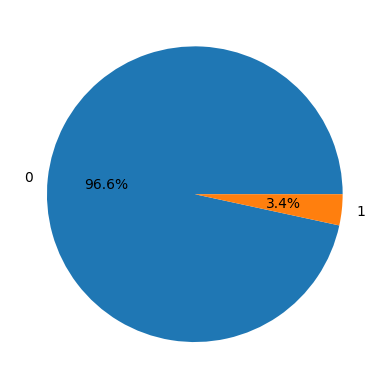

In [15]:
origdf.groupby('machine_failure').size().plot(kind='pie',autopct='%1.1f%%')
mplt.show()

CLASS IMBALANCE occurs when one class is much less prevalent than the others within the the label. Even though this is a synthetic dataset, within Predictive Maintaince use cases, this is a common occurence as machine failures are less common compared to non-failures.

Usually this is a challenge for ML models as the model may not have enough samples from the less common class to fully understand the patterns and accurately generate predictions.

Depending on a few considerations and the use case, there are a number of techniques available such as up-sampling, down-sampling.

we will use up-sampling as our failure data is much less than the success one

In [16]:
machine_failure = origdf[origdf['machine_failure']==1]
machine_success = origdf[origdf['machine_failure']==0]
print("Shape of Machine Failure = {}".format(machine_failure.shape))
print("Shape of Machine Success = {}".format(machine_success.shape))

Shape of Machine Failure = (339, 12)
Shape of Machine Success = (9661, 12)


In [17]:
MachineFailure_upsample = resample(machine_failure,
             replace=True,
             n_samples=len(machine_success)//2,
             random_state=42)

print(MachineFailure_upsample.shape)

(4830, 12)


In [18]:
# merge with the dataset
upsampled_df = pd.concat([machine_success, MachineFailure_upsample])
upsampled_df.shape

(14491, 12)

In [19]:
upsampled_df['machine_failure'].value_counts()

,count
machine_failure,
0,9661
1,4830


#### Feature Correlations

Now let's explore correlations between our features and the label within the dataset. This helps in identifying features that are important for generating predictions and therefore should be retained in the training dataset.

We start by plotting a heatmap.

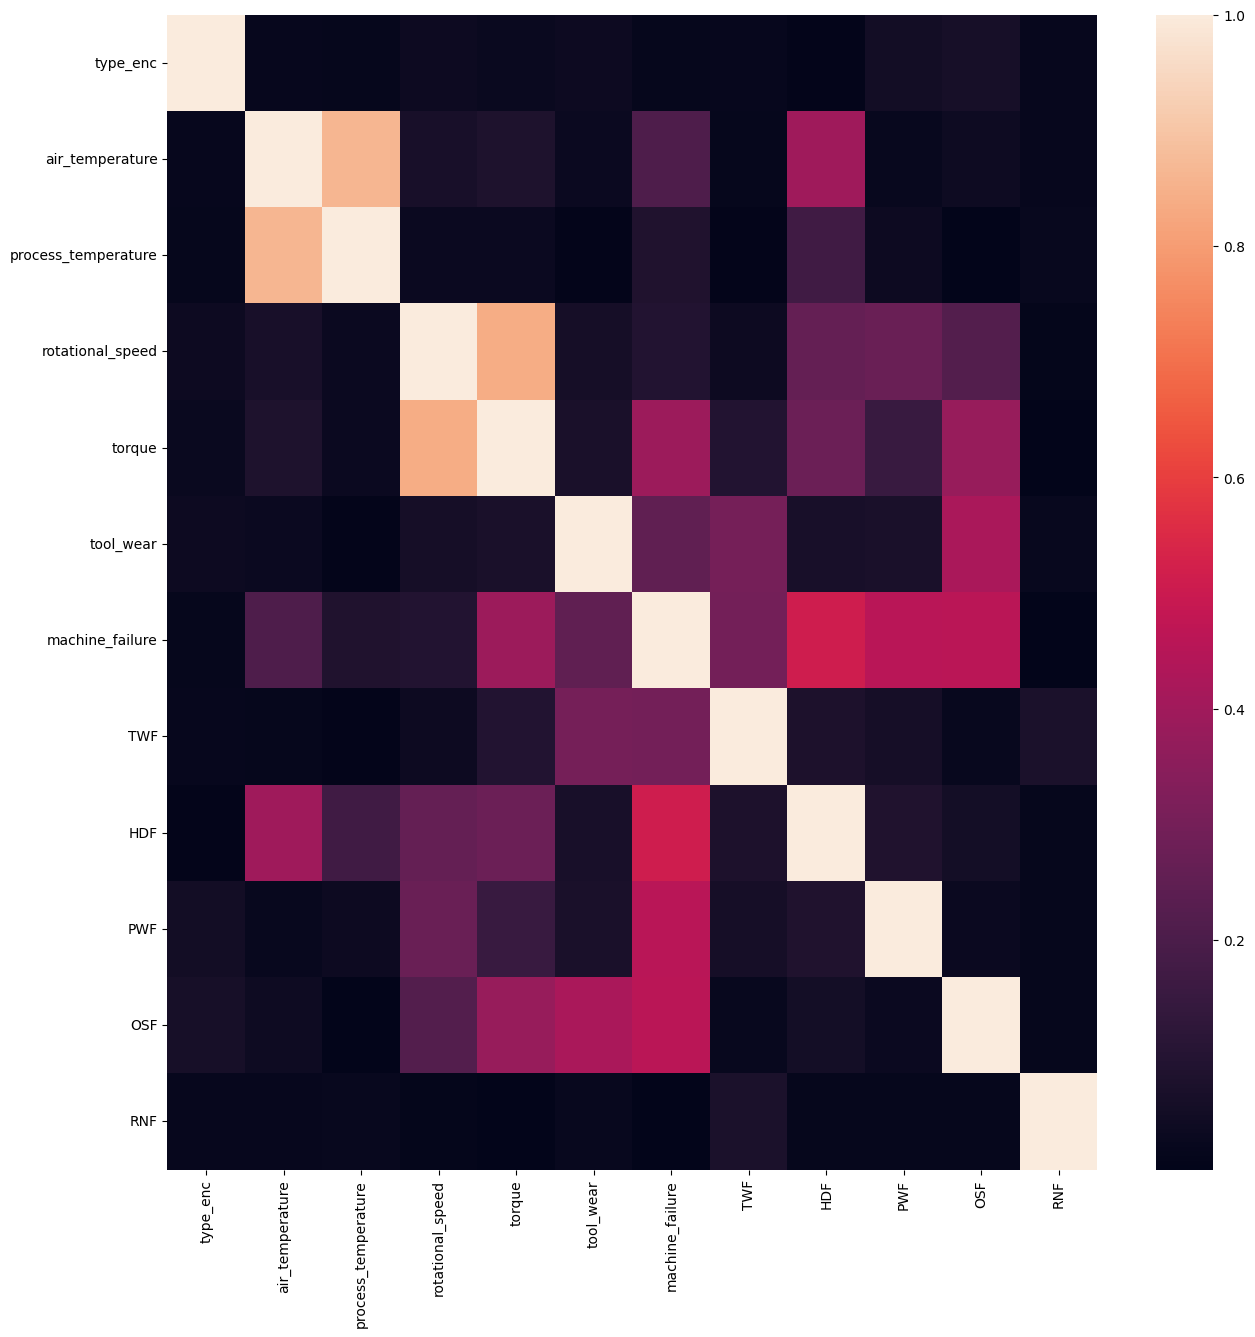

In [20]:
corr = upsampled_df.corr()

mplt.figure(figsize= (15, 15))
sb.heatmap(np.abs(corr))
mplt.show()

In [21]:
corr

,type_enc,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
type_enc,1.000000,0.020631,0.016038,0.036251,-0.025283,-0.033437,-0.015747,-0.017558,-0.005475,0.051755,-0.063689,-0.020418
air_temperature,0.020631,1.000000,0.862921,-0.067200,0.079620,-0.029374,0.207143,-0.016211,0.398990,-0.023874,-0.036748,0.018372
process_temperature,0.016038,0.862921,1.000000,-0.030036,0.030724,-0.008763,0.086800,-0.006080,0.171817,-0.034300,-0.001548,0.022467
rotational_speed,0.036251,-0.067200,-0.030036,1.000000,-0.836952,-0.058589,-0.091391,0.036392,-0.260056,0.272744,-0.219794,-0.011390
torque,-0.025283,0.079620,0.030724,-0.836952,1.000000,0.068975,0.391194,-0.092546,0.276226,0.151229,0.376593,0.004519
tool_wear,-0.033437,-0.029374,-0.008763,-0.058589,0.068975,1.000000,0.248880,0.299488,-0.067304,-0.070083,0.421699,0.022407
machine_failure,-0.015747,0.207143,0.086800,-0.091391,0.391194,0.248880,1.000000,0.296985,0.511637,0.457366,0.459939,0.004370
TWF,-0.017558,-0.016211,-0.006080,0.036392,-0.092546,0.299488,0.296985,1.000000,-0.075966,-0.056189,-0.023957,0.075051
HDF,-0.005475,0.398990,0.171817,-0.260056,0.276226,-0.067304,0.511637,-0.075966,1.000000,-0.083834,-0.052369,-0.016200
PWF,0.051755,-0.023874,-0.034300,0.272744,0.151229,-0.070083,0.457366,-0.056189,-0.083834,1.000000,0.031075,-0.014481


There does seem to be certain degree of correlation between the failure modes TWF, HDF, PWF, OSF  and system readings such as temperature, torque, rotational speed etc. This is expected as the modes are derived based on the underlying readings.

Next let's try to identify what features correlate strongly with the failure label.

In [22]:
# get the index of all the features in the corr matrix
index_list = list(corr['machine_failure'].dropna().index)

# get the values of all the correlation between machine failure and th rest of the features
# get the absolute values bc we are interested in the strength not the correlation sign
# sort the values of the corrlations and then return the indices after it's been sorted
# reverse the order so that we get the ones with larger strength first
val_list = np.argsort(np.abs(corr['machine_failure'].dropna().values))[::-1]

In [23]:
val_list

array([ 6,  8, 10,  9,  4,  7,  5,  1,  3,  2,  0, 11])

In [24]:
index_list[2]

'process_temperature'

We get a ordered list of most corelated fesatures to the failure label and remove the label itself.

In [25]:
top_corrs = [index_list[x] for x in val_list]
SortedCorrData = upsampled_df[top_corrs]
SortedCorrData.head()

,machine_failure,HDF,OSF,PWF,torque,TWF,tool_wear,air_temperature,rotational_speed,process_temperature,type_enc,RNF
0,0,0,0,0,42.8,0,0,298.1,1551,308.6,2,0
1,0,0,0,0,46.3,0,3,298.2,1408,308.7,1,0
2,0,0,0,0,49.4,0,5,298.1,1498,308.5,1,0
3,0,0,0,0,39.5,0,7,298.2,1433,308.6,1,0
4,0,0,0,0,40.0,0,9,298.2,1408,308.7,1,0


The failure modes features TWF, HDF, PWF, OSF have stronger correlation to the failure label. Howerver for our use case, since the system readings will be streamed, we will assume features TWF, HDF, PWF, OSF are not available during inference. Additionally, we want the model to be able predict failures based on the foundational systematic features. Therefore we will be remove these from the dataset. We will also remove RNF for similiar reasons.

In [26]:
# dropping cols
processdf = SortedCorrData.drop(columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
# replace na with 0
processdf=processdf.replace('na',0)
#change data types to numerical
processdf = processdf.apply(pd.to_numeric)
print("Shape of the processed dataset ={}".format(processdf.shape))



Shape of the processed dataset =(14491, 7)


In [27]:
processdf.head(5)

,machine_failure,torque,tool_wear,air_temperature,rotational_speed,process_temperature,type_enc
0,0,42.8,0,298.1,1551,308.6,2
1,0,46.3,3,298.2,1408,308.7,1
2,0,49.4,5,298.1,1498,308.5,1
3,0,39.5,7,298.2,1433,308.6,1
4,0,40.0,9,298.2,1408,308.7,1


Rearranging the columns so that the label is at position 1.

In [28]:
finaldf = processdf[['torque', 'tool_wear', 'air_temperature', 'rotational_speed', 'process_temperature', 'type_enc', 'machine_failure']]

In [29]:
finaldf.head(5)

,torque,tool_wear,air_temperature,rotational_speed,process_temperature,type_enc,machine_failure
0,42.8,0,298.1,1551,308.6,2,0
1,46.3,3,298.2,1408,308.7,1,0
2,49.4,5,298.1,1498,308.5,1,0
3,39.5,7,298.2,1433,308.6,1,0
4,40.0,9,298.2,1408,308.7,1,0


In [30]:
finaldf.describe()

,torque,tool_wear,air_temperature,rotational_speed,process_temperature,type_enc,machine_failure
count,14491.000000,14491.000000,14491.000000,14491.000000,14491.000000,14491.000000,14491.000000
mean,43.281547,118.723760,300.275668,1523.476503,310.084377,1.193568,0.333310
std,13.203153,68.364288,2.059743,259.736749,1.447040,0.575797,0.471413
min,3.800000,0.000000,295.300000,1168.000000,305.700000,0.000000,0.000000
25%,34.800000,60.000000,298.500000,1369.000000,309.000000,1.000000,0.000000
50%,43.600000,119.000000,300.400000,1458.000000,310.200000,1.000000,0.000000
75%,52.200000,182.000000,302.000000,1584.000000,311.100000,2.000000,1.000000
max,76.600000,253.000000,304.500000,2886.000000,313.800000,2.000000,1.000000


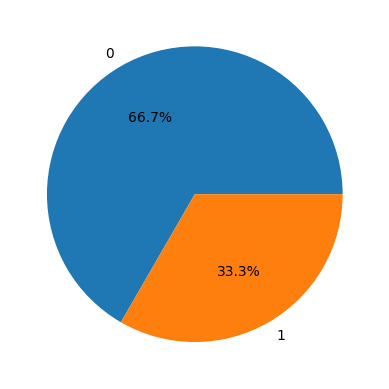

In [31]:
finaldf.groupby('machine_failure').size().plot(kind='pie',autopct='%1.1f%%')
mplt.show()

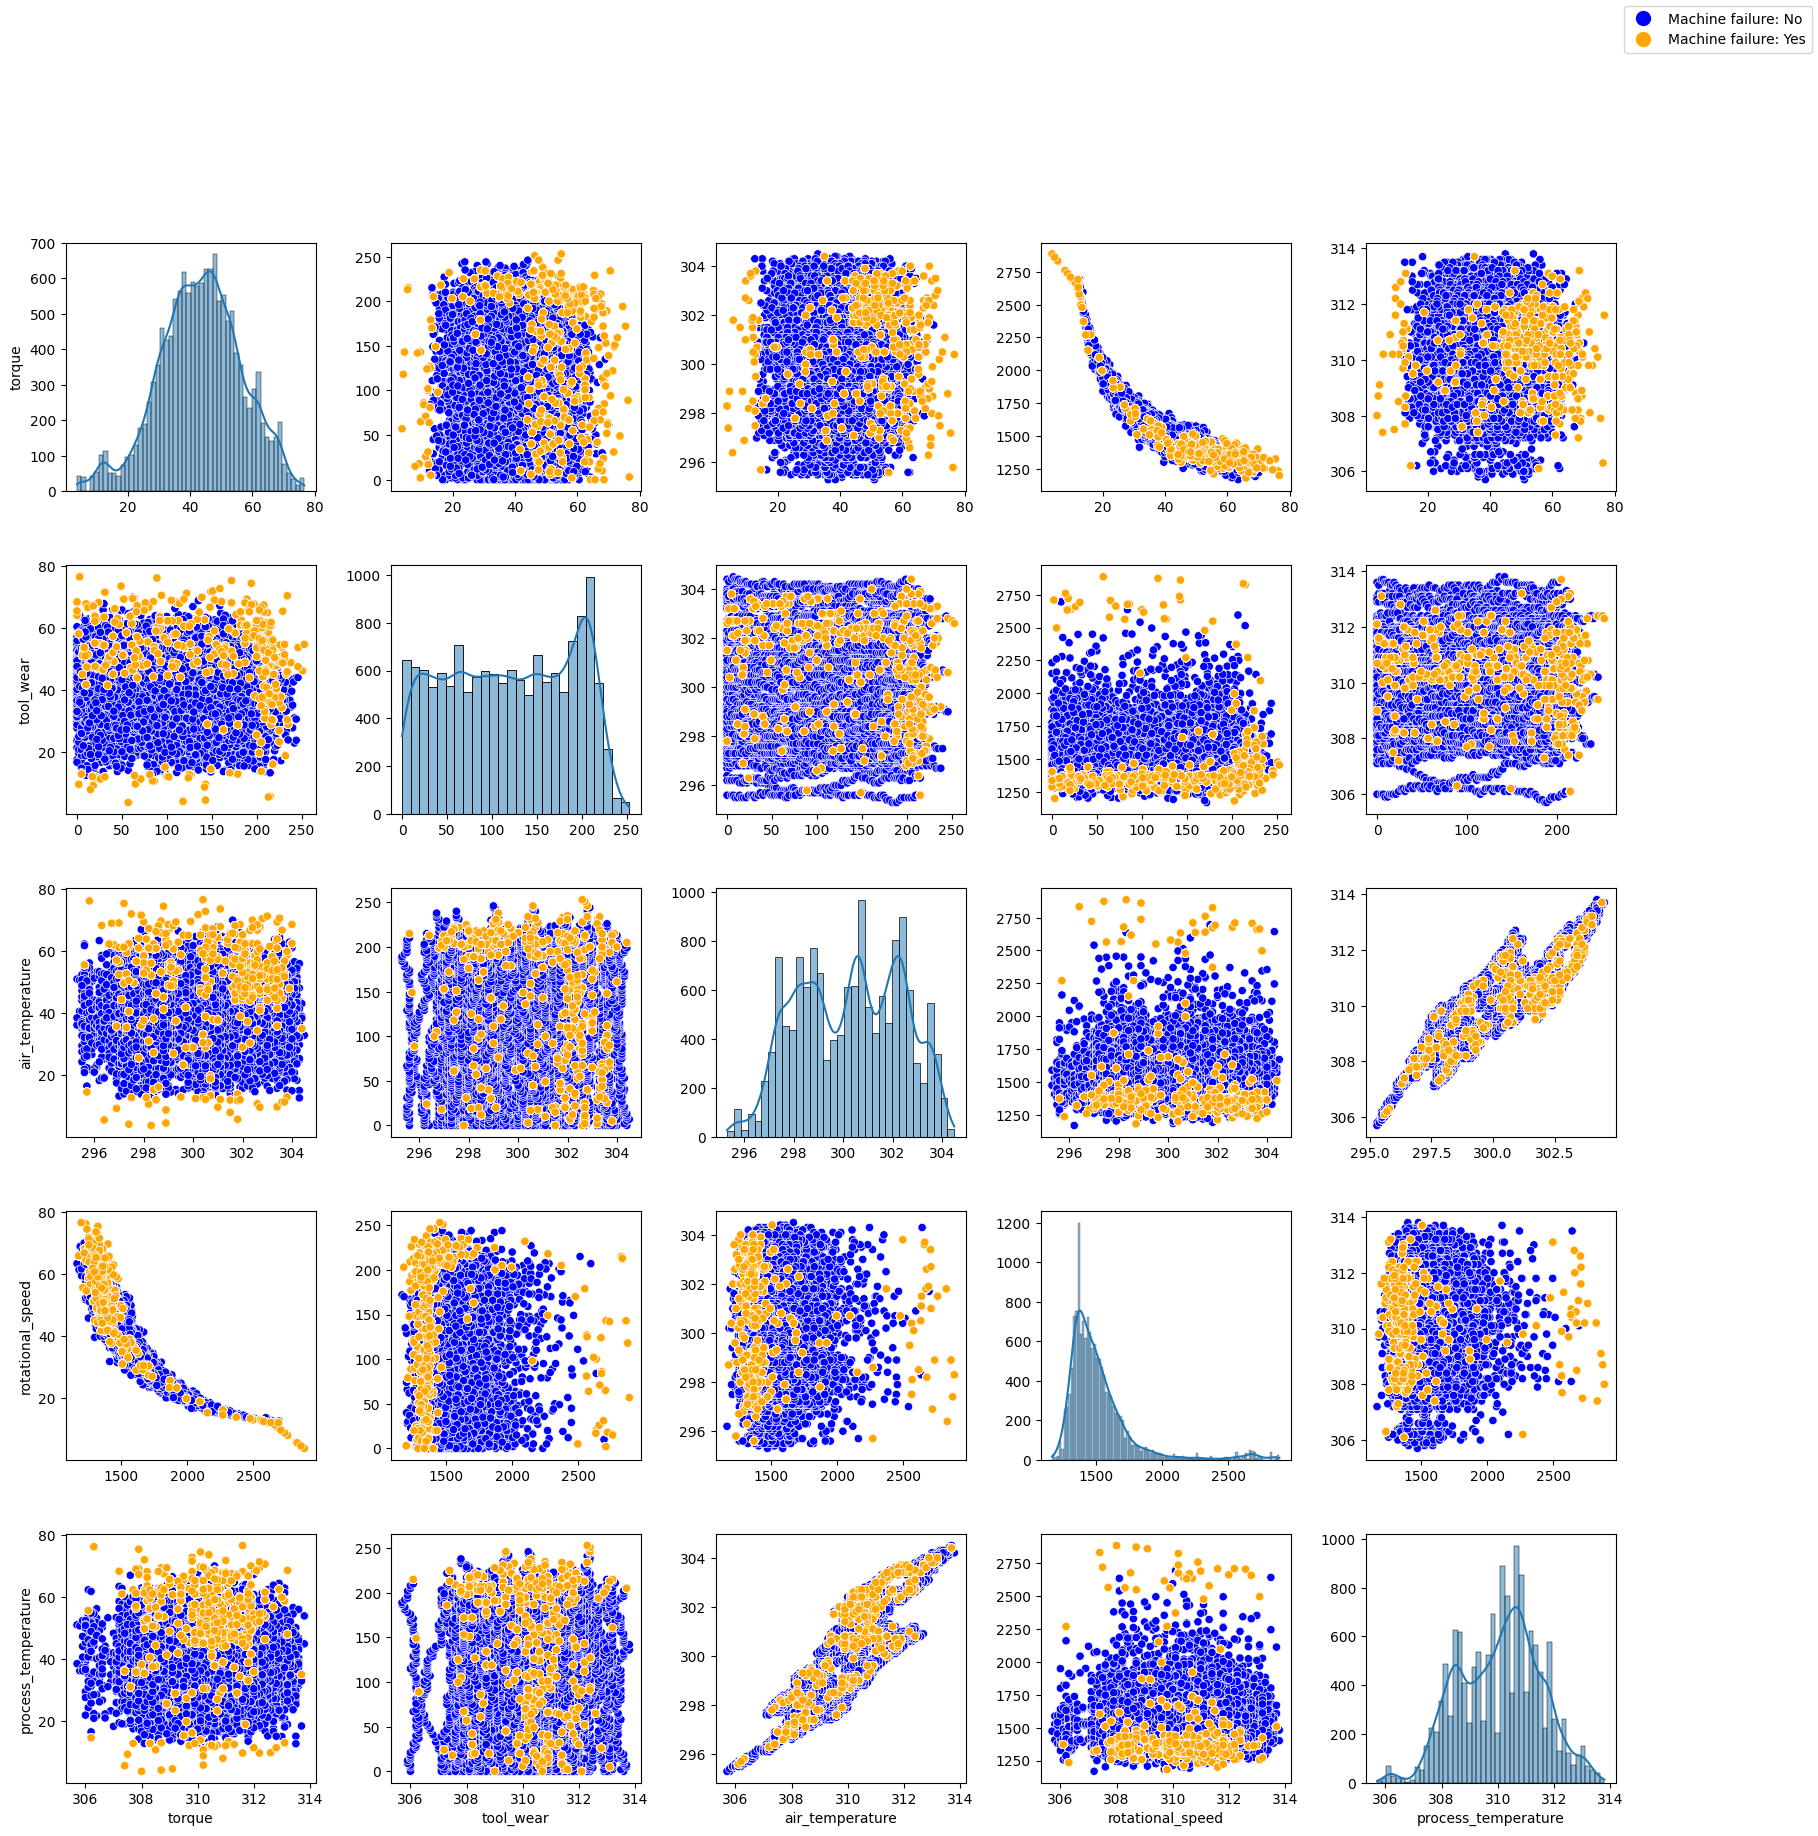

In [32]:
numerical_features = [
    'torque', 'tool_wear', 'air_temperature', 'rotational_speed',
       'process_temperature'
]

# Creating subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=len(numerical_features), figsize=(20, 20))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Plotting pairwise correlations
for i, feature1 in enumerate(numerical_features):
    for j, feature2 in enumerate(numerical_features):
        ax = axes[i, j]
        if i == j:
            sns.histplot(finaldf[feature1], kde=True, ax=ax)
        else:
            sns.scatterplot(
                x=finaldf[feature1],
                y=finaldf[feature2],
                hue=finaldf['machine_failure'],
                palette={0: 'blue', 1: 'orange'},
                ax=ax,
                legend = False
            )
        if i == len(numerical_features) - 1:
            ax.set_xlabel(feature2)
        else:
            ax.set_xlabel('')
        if j == 0:
            ax.set_ylabel(feature1)
        else:
            ax.set_ylabel('')

custom_lines = [Line2D([0], [0], color='blue', lw=0, marker='o', markersize=10),
                Line2D([0], [0], color='orange', lw=0, marker='o', markersize=10)]

fig.legend(custom_lines, ['Machine failure: No', 'Machine failure: Yes'], loc='upper right',frameon=True, facecolor='white')

plt.show()

#Histograms
Air temperature (K): Appears to be roughly normally distributed.<br>
Process temperature (K): Also looks normally distributed.<br>
Rotational speed (rpm): A highly skewed distribution.<br>
Torque (Nm): Also looks normally distributed.<br>
Tool wear (min): Fairly uniform distribution over time, indicating tool wear is evenly spread across different values.<br>

#Scatterplots
Air temperature vs Process temperature: A strong linear relationship (positive correlation). As air temperature increases, process temperature also increases.<br>
Air temperature vs Rotational speed: No clear pattern; the points are spread widely, indicating no direct relationship.<br>
Air temperature vs Torque: No strong relationship visible.<br>
Air temperature vs Tool wear: The scatter is very broad, suggesting no correlation.<br>
Process temperature vs Rotational speed: No direct correlation, similar to air temperature.<br>
Process temperature vs Torque: No visible pattern.<br>
Process temperature vs Tool wear: Again, no strong correlation seen.<br>
Rotational speed vs Torque: There is an inverse relationship (as rotational speed increases, torque decreases).<br>
Rotational speed vs Tool wear: No clear relationship.<br>
Torque vs Tool wear: Again, no strong correlation seen.<br>

### Data Split & Export

Splitting the dataset into train and test sets and exporting locally to training and test folders.

In [33]:
X_train, X_test = train_test_split(finaldf, test_size=0.2, random_state = 1234)
X_train.to_csv('training_data/train.csv', index = False)
X_test.to_csv('test_data/test.csv', index=False)
finaldf.to_csv('fulldataset.csv', index=False)
print("Shape of Training data = {}".format(X_train.shape))
print("Shape of Test data = {}".format(X_test.shape))

Shape of Training data = (11592, 7)
Shape of Test data = (2899, 7)
